In [1]:
import os
import pickle

In [2]:
from img2vec_pytorch import Img2Vec
from PIL import Image
from sklearn.ensemble import RandomForestClassifier

# Data preprocessing

In [8]:
img2vec = Img2Vec()

data_dir = '../data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

data = {}
for j, dir_ in enumerate([train_dir, val_dir]):
    features = []
    labels = []
    for category in os.listdir(dir_):
        for img_path in os.listdir(os.path.join(dir_, category)):
            img_path_ = os.path.join(dir_, category, img_path)
            img = Image.open(img_path_).convert('RGB')

            img_features = img2vec.get_vec(img)

            features.append(img_features)
            labels.append(category)

    data[['training_data', 'validation_data'][j]] = features
    data[['training_labels', 'validation_labels'][j]] = labels


# Model training

In [9]:
model = RandomForestClassifier(random_state=0)
model.fit(data['training_data'], data['training_labels'])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Performance testing

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(data['validation_data'])
score = accuracy_score(y_pred, data['validation_labels'])

print(score)

0.97


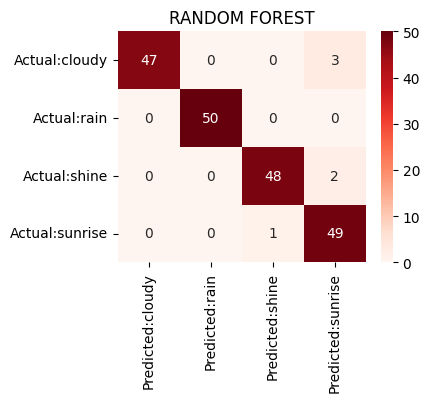

The details for confusion matrix is =
              precision    recall  f1-score   support

      cloudy       1.00      0.94      0.97        50
        rain       1.00      1.00      1.00        50
       shine       0.98      0.96      0.97        50
     sunrise       0.91      0.98      0.94        50

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = pd.DataFrame(
    data=confusion_matrix(data['validation_labels'], y_pred),
    columns=['Predicted:cloudy', 'Predicted:rain', 'Predicted:shine', 'Predicted:sunrise'],  
    index=['Actual:cloudy', 'Actual:rain', 'Actual:shine', 'Actual:sunrise']                
)

plt.figure(figsize = (4, 3))
plt.title('RANDOM FOREST')
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Reds")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(data['validation_labels'], y_pred))

In [12]:
# save the model
with open('./model.p', 'wb') as f:
    pickle.dump(model, f)
    f.close()